In [ ]:
# importing some required libraries
import pandas as pd
from nltk.corpus import stopwords
import string
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
# reading the dataset
columns = ["sentiment", "id", "date", "query", "user_id", "text"]
df = pd.read_csv("/content/drive/MyDrive/SEM_^/ML/Lab-06/data.csv", encoding="latin",names=columns)
df.head(5)


,sentiment,id,date,query,user_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# replacing the '4' with '1' as positive sentiment
df["sentiment"] = df["sentiment"].replace(4,1)

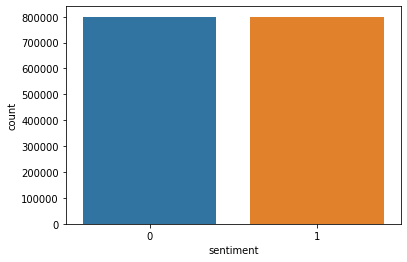

In [ ]:
sns.countplot(x='sentiment',data=df)

In [ ]:
#creating a string of positive tweets to analyze the words
# positive_tweets = df[df['sentiment'] == 1]['text'].tolist()
# positive_tweets_string = " ".join(positive_tweets)
# plt.figure(figsize=(15,15))
# plt.imshow(WordCloud().generate(positive_tweets_string))

In [ ]:
# creating the string of negative tweets to analyze the words
# negative_tweets = df[df['sentiment'] == 0]['text'].tolist()
# negative_tweets_string = " ".join(negative_tweets)
# plt.figure(figsize=(15,15))
# plt.imshow(WordCloud().generate(negative_tweets_string))

In [ ]:
data_pos =  df[df['sentiment'] == 1]
data_neg =  df[df['sentiment'] == 0]
data_pos = data_pos.iloc[:int(12000)]
data_neg = data_neg.iloc[:int(12000)]
dataset = pd.concat([data_pos,data_neg])
dataset['text']=dataset['text'].str.lower()

In [ ]:
# A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore
#removing stopwords,urls from the dataset

stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].head()


800000                love @health4uandpets u guys r best!!
800001    im meeting one besties tonight! cant wait!! - ...
800002    @darealsunisakim thanks twitter add, sunisa! g...
800003    sick really cheap hurts much eat real food plu...
800004                      @lovesbrooklyn2 effect everyone
Name: text, dtype: object

In [ ]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].tail()

11995    upstairs neighbor's kids loud. it's lile brick...
11996    writing saturday? hell wrong me? time go fix s...
11997                @sraad yeeey. but didn't dare hoedown
11998                 @serena see that, get 30 mins? #supa
11999    @g33kgurrl aaw, aren't great? two silly cats l...
Name: text, dtype: object

In [ ]:
X = dataset['text'].tolist()
# Y = df.DataFrame(X)
Y = dataset['sentiment'].tolist()
print(type(dataset['text']))
print(dataset['sentiment'])

<class 'pandas.core.series.Series'>
800000    1
800001    1
800002    1
800003    1
800004    1
         ..
11995     0
11996     0
11997     0
11998     0
11999     0
Name: sentiment, Length: 24000, dtype: int64


In [ ]:
vectorizer = CountVectorizer() 

vector = vectorizer.fit(X)
# summarize encoded vector
vector.get_feature_names()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00',
 '000',
 '0000',
 '0007',
 '002',
 '00am',
 '00pm',
 '01',
 '01000101',
 '01614948343',
 '018',
 '02',
 '03',
 '04',
 '05',
 '0515',
 '05am',
 '05iphone',
 '05pm',
 '06',
 '07',
 '07am',
 '07raus09',
 '08',
 '08am',
 '09',
 '09pm',
 '0e4ad48a87bd4c0593931f6a4f652aef',
 '0g',
 '0mie',
 '0xdeadbeef',
 '10',
 '100',
 '1000',
 '10000',
 '1000000',
 '1000cigarettes',
 '1000th',
 '1001',
 '100gb',
 '100m2',
 '100mb',
 '100meg',
 '100miler',
 '100plus',
 '100th',
 '100x',
 '101',
 '1010ï',
 '101th',
 '102',
 '103',
 '1043840',
 '105',
 '106',
 '1080p',
 '1099',
 '10am',
 '10h30',
 '10ish',
 '10lbs',
 '10mbps',
 '10min',
 '10p',
 '10pack',
 '10pm',
 '10pt',
 '10th',
 '10x',
 '10ï',
 '11',
 '110',
 '1100',
 '1101',
 '111',
 '1110',
 '111adam',
 '112',
 '112915560',
 '115',
 '116',
 '117',
 '118',
 '11am',
 '11h',
 '11ish',
 '11m',
 '11p',
 '11pm',
 '11s',
 '11x17',
 '12',
 '120',
 '1200',
 '120x240',
 '1230',
 '1234',
 '123456',
 '123900',
 '123lottie',
 '125',
 '128',
 '1280x760',
 '128

In [ ]:
documents = vector.transform(X)
documents

<24000x32345 sparse matrix of type '<class 'numpy.int64'>'
	with 194254 stored elements in Compressed Sparse Row format>

In [ ]:
documents.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
pd.DataFrame(documents.toarray(),columns=vector.get_feature_names())

,00,000,0000,0007,002,00am,00pm,01,01000101,01614948343,...,½stand,½t,½tieï,½tobe,½tï,½u,½ve,½vel,½y,½ï
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# splitting the features into train and test
X_train, X_test,y_train, y_test = train_test_split(documents,df['sentiment'][:24000],random_state=114,test_size=0.15)

In [ ]:
# Multinomial Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train,y_train)

MultinomialNB()

In [ ]:
# predicting the labels
y_pred = clf.predict(X_test)


In [ ]:
# model accuracy
from sklearn import metrics
cm = confusion_matrix (y_test, y_pred)
print(cm)
metrics.accuracy_score(y_test,y_pred)

[[3600]]


1.0

In [ ]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=114)
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=114)

In [ ]:
y_pred = dt.predict(X_test)

In [ ]:
# model accuracy
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix (y_test, y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))

[[3600]]
1.0


In [ ]:
# https://www.ritchieng.com/machine-learning-multinomial-naive-bayes-vectorization/

SyntaxError: ignored